| [03_data_science/06_SciPy曲线拟合.ipynb](https://github.com/shibing624/python-tutorial/blob/master/03_data_science/06_SciPy曲线拟合.ipynb)  | Scipy曲线  |[Open In Colab](https://colab.research.google.com/github/shibing624/python-tutorial/blob/master/03_data_science/06_SciPy曲线拟合.ipynb) |

# SciPy曲线拟合

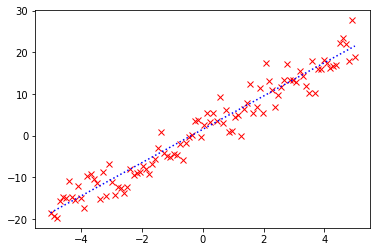

In [14]:
# 导入基础包：
import matplotlib.pyplot as plt
import numpy as np
# 多项式拟合
from numpy import polyfit, poly1d

# 产生数据：
x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5

p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')
plt.show()

进行线性拟合，polyfit 是多项式拟合函数，线性拟合即一阶多项式：

In [2]:
coeff = polyfit(x, noise_y, 1)
coeff

array([3.95455496, 1.14016421])

一阶多项式 y=a1x+a0y=a1x+a0 拟合，返回两个系数 [a1,a0][a1,a0]。


画出拟合曲线：

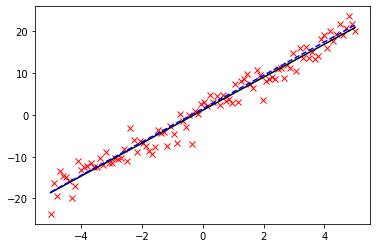

In [3]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')
p = plt.plot(x, y, 'b--')
plt.show()

### 多项式拟合余弦函数


余弦函数：

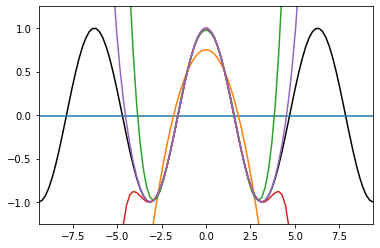

In [4]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)

# 用一阶到九阶多项式拟合，类似泰勒展开：
# 可以用 poly1d 生成一个以传入的 coeff 为参数的多项式函数：
y1 = poly1d(polyfit(x, y, 1))
y3 = poly1d(polyfit(x, y, 3))
y5 = poly1d(polyfit(x, y, 5))
y7 = poly1d(polyfit(x, y, 7))
y9 = poly1d(polyfit(x, y, 9))
x = np.linspace(-3 * np.pi, 3 * np.pi, 100)

p = plt.plot(x, np.cos(x), 'k')  # 黑色余弦
p = plt.plot(x, y1(x))
p = plt.plot(x, y3(x))
p = plt.plot(x, y5(x))
p = plt.plot(x, y7(x))
p = plt.plot(x, y9(x))

a = plt.axis([-3 * np.pi, 3 * np.pi, -1.25, 1.25])
plt.show()

黑色为原始的图形，可以看到，随着多项式拟合的阶数的增加，
曲线与拟合数据的吻合程度在逐渐增大。


### 最小二乘拟合
导入相关的模块：

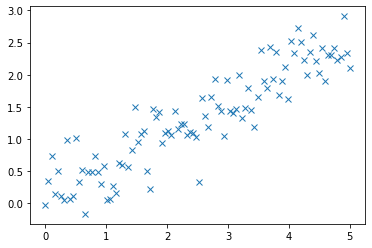

In [5]:
from scipy.stats import linregress

x = np.linspace(0, 5, 100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35

plt.plot(x, y, 'x')
plt.show()

Scipy.linalg.lstsq 最小二乘解

可以使用 scipy.linalg.lstsq 求最小二乘解。

In [6]:
X = np.hstack((x[:, np.newaxis], np.ones((x.shape[-1], 1))))
print(X[1:5])

# 求解：
from scipy.linalg import lstsq
C, resid, rank, s = lstsq(X, y)
print(C, resid, rank, s)

[[0.05050505 1.        ]
 [0.1010101  1.        ]
 [0.15151515 1.        ]
 [0.2020202  1.        ]]
[0.48056456 0.1129315 ] 10.677977058552019 2 [30.23732043  4.82146667]


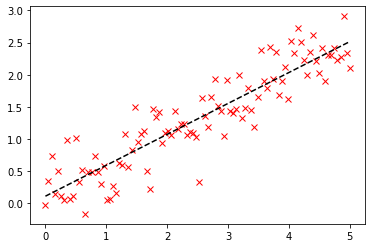

sum squared residual = 10.678
rank of the X matrix = 2
singular values of X = [30.23732043  4.82146667]


In [7]:
# 画图：
p = plt.plot(x, y, 'rx')
p = plt.plot(x, C[0] * x + C[1], 'k--')
plt.show()

print("sum squared residual = {:.3f}".format(resid))
print("rank of the X matrix = {}".format(rank))
print("singular values of X = {}".format(s))


### Scipy.stats.linregress 线性回归
对于上面的问题，还可以使用线性回归进行求解：

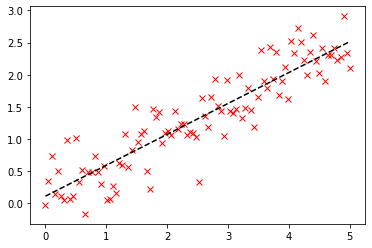

R-value = 0.906
p-value (probability there is no correlation) = 1.985e-38
Root mean squared error of the fit = 0.150


In [8]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)
p = plt.plot(x, y, 'rx')
p = plt.plot(x, slope * x + intercept, 'k--')
plt.show()

print("R-value = {:.3f}".format(r_value))
print("p-value (probability there is no correlation) = {:.3e}".format(p_value))
print("Root mean squared error of the fit = {:.3f}".format(np.sqrt(stderr)))

可以看到，两者求解的结果是一致的，但是出发的角度是不同的。

### 高级的拟合

先定义这个非线性函数：y=ae^(−bsin(fx+ϕ))

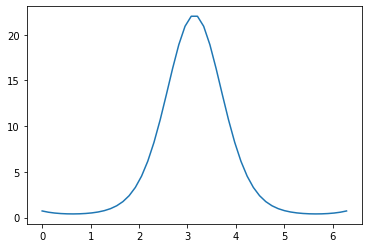

In [9]:
def function(x, a, b, f, phi):
    """a function of x with four parameters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result


# 画出原始曲线：
x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi / 4]
y = function(x, *actual_parameters)
p = plt.plot(x, y)
plt.show()

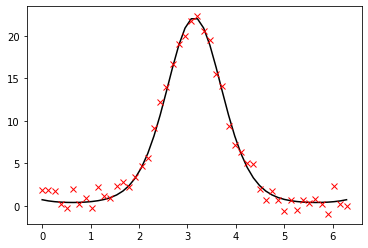

In [10]:
# 加入噪声：
from scipy.stats import norm

y_noisy = y + 0.8 * norm.rvs(size=len(x))
p = plt.plot(x, y, 'k-')
p = plt.plot(x, y_noisy, 'rx')
plt.show()

高级的做法：

不需要定义误差函数，直接传入 function 作为参数：

In [11]:
from scipy.optimize import curve_fit

p_est, err_est = curve_fit(function, x, y_noisy)
p_est

array([3.49361679, 1.84275016, 1.28922873, 0.6823318 ])

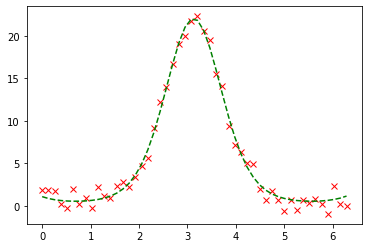

In [12]:
p = plt.plot(x, y_noisy, "rx")
p = plt.plot(x, function(x, *p_est), "g--")
plt.show()

In [13]:
# 这里 curve_fit 第一个返回的是函数的参数，第二个返回值为各个参数的协方差矩阵：
print(p_est)
print(err_est)

# 协方差矩阵的对角线为各个参数的方差：
print("normalized relative errors for each parameter")
print("   a\t    b\t    f\t    phi")
print(np.sqrt(err_est.diagonal()) / p_est)

[3.49361679 1.84275016 1.28922873 0.6823318 ]
[[ 0.11276683 -0.03200496  0.01190229 -0.03722662]
 [-0.03200496  0.00936836 -0.00321958  0.01007001]
 [ 0.01190229 -0.00321958  0.00178671 -0.00558783]
 [-0.03722662  0.01007001 -0.00558783  0.01770848]]
normalized relative errors for each parameter
   a	    b	    f	    phi
[0.09612037 0.05252491 0.03278666 0.19502711]


本节完。